In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

## Import Libraries and Define Auxiliary Functions

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.

In [10]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe

In [21]:
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL1)
response.raise_for_status() 

spacex_df = pd.read_csv(io.StringIO(response.text))
print(spacex_df.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [36]:
import requests
import pandas as pd
import io

URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL2)
response.raise_for_status()  # Check for request errors

X = pd.read_csv(io.StringIO(response.text))
print(X.head(100))

    FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0              1  2010-06-04       Falcon 9   6104.959412   LEO  CCAFS SLC 40   
1              2  2012-05-22       Falcon 9    525.000000   LEO  CCAFS SLC 40   
2              3  2013-03-01       Falcon 9    677.000000   ISS  CCAFS SLC 40   
3              4  2013-09-29       Falcon 9    500.000000    PO   VAFB SLC 4E   
4              5  2013-12-03       Falcon 9   3170.000000   GTO  CCAFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
85            86  2020-09-03       Falcon 9  15400.000000  VLEO    KSC LC 39A   
86            87  2020-10-06       Falcon 9  15400.000000  VLEO    KSC LC 39A   
87            88  2020-10-18       Falcon 9  15400.000000  VLEO    KSC LC 39A   
88            89  2020-10-24       Falcon 9  15400.000000  VLEO  CCAFS SLC 40   
89            90  2020-11-05       Falcon 9   3681.000000   MEO  CCAFS SLC 40   

        Outcome  Flights  G

## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [40]:
Y = data['Class'].to_numpy()

## TASK  2
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [51]:
from sklearn import preprocessing

X = data.drop(columns=['Class'])
X = X.select_dtypes(include=['float64', 'int64'])

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 1: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Further split the training data into training and validation sets
X_train_final, X_val, Y_train_final, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Step 3: Set up the model and parameters for GridSearchCV
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Step 4: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Step 5: Fit the model
grid_search.fit(X_train_final, Y_train_final)

# Display the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


## TASK  3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [60]:
# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Display the shapes of the resulting datasets
print(f"Training feature set shape: {X_train.shape}")
print(f"Test feature set shape: {X_test.shape}")
print(f"Training target set shape: {Y_train.shape}")
print(f"Test target set shape: {Y_test.shape}")

Training feature set shape: (72, 17)
Test feature set shape: (18, 17)
Training target set shape: (72,)
Test target set shape: (18,)


we can see we only have 18 test samples.

In [63]:
Y_test.shape

(18,)

## TASK  4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [66]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [68]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [77]:
logreg = LogisticRegression(max_iter=1000)
logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10, n_jobs=-1)
logreg_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 929, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2016-03-04'

--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 929, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 430, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\utente\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2017-05-15'


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Load the dataset
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL2)

# Display data types
print(data.dtypes)

# Convert date columns to datetime format (example assuming 'date_column' is a date feature)
# data['date_column'] = pd.to_datetime(data['date_column'])

# Example: If you have a date column, you could extract year, month, etc.
# data['year'] = data['date_column'].dt.year
# data['month'] = data['date_column'].dt.month
# data.drop(columns=['date_column'], inplace=True)  # Drop the original date column if no longer needed

# Prepare the data
Y = data['Class'].to_numpy()  # Target variable
X = data.drop(columns=['Class'])  # Features

# Convert categorical features using one-hot encoding if necessary
X = pd.get_dummies(X)

# Standardize the features
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Logistic Regression object
logreg = LogisticRegression(max_iter=1000)  # Ensure convergence

# Define the parameter grid for GridSearchCV
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear']  # Optimization algorithms
}

# Create a GridSearchCV object
logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10, n_jobs=-1)

# Fit the model to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Output the best parameters found
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy (best score):", logreg_cv.best_score_)

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object
Tuned hyperparameters (best parameters): {'C': 100, 'solver': 'lbfgs'}
Accuracy (best score): 0.9303571428571429


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:

In [82]:
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8888888888888888


Lets look at the confusion matrix:

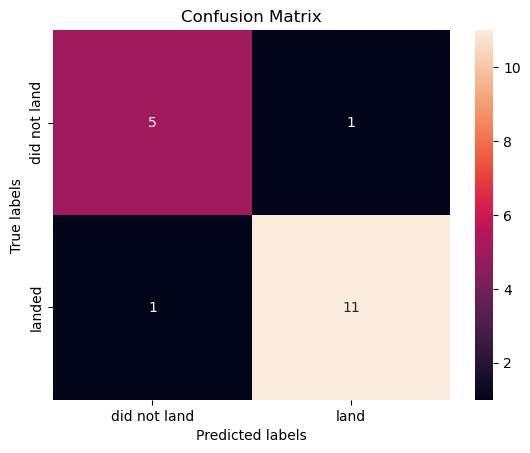

In [85]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

## TASK  6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [89]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing

# Load the dataset
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL2)

# Prepare the data
Y = data['Class'].to_numpy()  # Target variable
X = data.drop(columns=['Class'])  # Features

# Convert categorical features using one-hot encoding if necessary
X = pd.get_dummies(X)

# Standardize the features
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Support Vector Machine object
svm = SVC()

# Define the parameter grid for GridSearchCV
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),  # Different kernel types
    'C': np.logspace(-3, 3, 5),  # Regularization parameter
    'gamma': np.logspace(-3, 3, 5)  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
}

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, n_jobs=-1)

# Fit the model to find the best parameters
svm_cv.fit(X_train, Y_train)

# Output the best parameters found
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation score:", svm_cv.best_score_)

# Calculate the accuracy on the test data
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Tuned hyperparameters (best parameters): {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best cross-validation score: 0.9857142857142858
Accuracy on test data: 1.0


## TASK  7
Calculate the accuracy on the test data using the method <code>score</code>:

In [94]:
accuracy = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8888888888888888


We can plot the confusion matrix

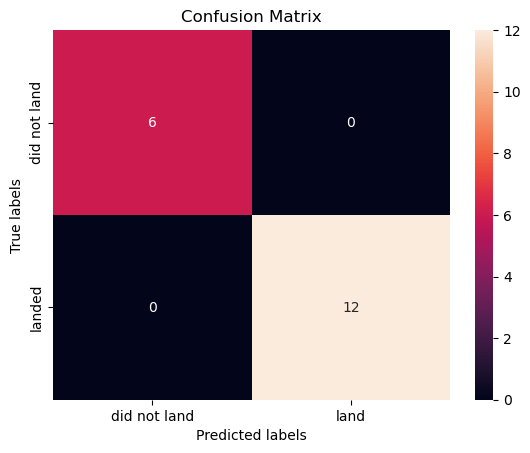

In [97]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [100]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Load the dataset
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL2)

# Prepare the data
Y = data['Class'].to_numpy()  # Target variable
X = data.drop(columns=['Class'])  # Features

# Convert categorical features using one-hot encoding if necessary
X = pd.get_dummies(X)

# Standardize the features
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, n_jobs=-1)

# Fit the model to find the best parameters
tree_cv.fit(X_train, Y_train)

# Output the best parameters found
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Best cross-validation score:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation score: 0.9446428571428571


## TASK  9
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [108]:
# Calculate the accuracy on the test data
accuracy = tree_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9444444444444444


We can plot the confusion matrix

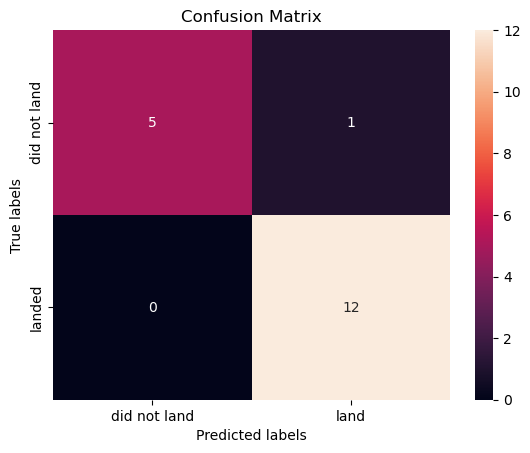

In [111]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10
Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [119]:
# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=10, n_jobs=-1)

# Fit the model to find the best parameters
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

## TASK  11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [121]:
# Output the best parameters found
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best cross-validation score:", knn_cv.best_score_)

# Calculate the accuracy on the test data
accuracy = knn_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy on test data:", accuracy)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
Best cross-validation score: 0.8875
Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix

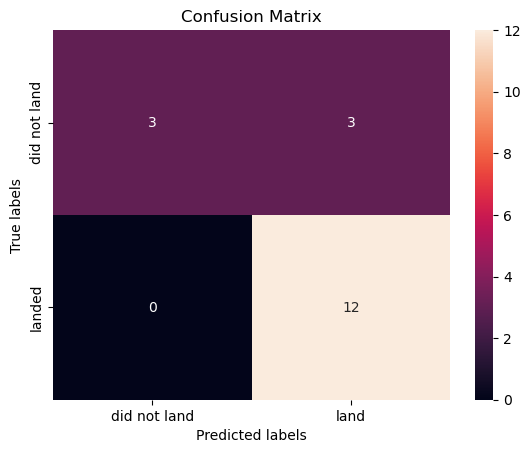

In [124]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12
Find the method performs best:

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL2)

# Prepare the data
Y = data['Class'].to_numpy()  # Target variable
X = data.drop(columns=['Class'])  # Features

# Convert categorical features using one-hot encoding if necessary
X = pd.get_dummies(X)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
parameters_logreg = {'C': np.logspace(-3, 3, 7), 'solver': ['liblinear', 'saga']}
logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters_logreg, cv=10, n_jobs=-1)
logreg_cv.fit(X_train, Y_train)
logreg_accuracy = logreg_cv.score(X_test, Y_test)

# Support Vector Machine
parameters_svm = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters_svm, cv=10, n_jobs=-1)
svm_cv.fit(X_train, Y_train)
svm_accuracy = svm_cv.score(X_test, Y_test)

# Decision Tree Classifier
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters_tree, cv=10, n_jobs=-1)
tree_cv.fit(X_train, Y_train)
tree_accuracy = tree_cv.score(X_test, Y_test)

# K-Nearest Neighbors
parameters_knn = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters_knn, cv=10, n_jobs=-1)
knn_cv.fit(X_train, Y_train)
knn_accuracy = knn_cv.score(X_test, Y_test)

# Compare and print accuracies
print("Logistic Regression accuracy:", logreg_accuracy)
print("Support Vector Machine accuracy:", svm_accuracy)
print("Decision Tree accuracy:", tree_accuracy)
print("K-Nearest Neighbors accuracy:", knn_accuracy)

# Determine the best performing model
accuracies = {
    'Logistic Regression': logreg_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Decision Tree': tree_accuracy,
    'K-Nearest Neighbors': knn_accuracy
}

best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"The best performing model is: {best_model} with an accuracy of {best_accuracy:.2f}")

Logistic Regression accuracy: 0.9444444444444444
Support Vector Machine accuracy: 1.0
Decision Tree accuracy: 0.9444444444444444
K-Nearest Neighbors accuracy: 0.8333333333333334
The best performing model is: Support Vector Machine with an accuracy of 1.00


In [129]:
# Assuming svm_cv has already been fitted
best_kernel = svm_cv.best_params_['kernel']
best_score = svm_cv.best_score_

print(f"The best kernel for SVM is: {best_kernel} with a score of: {best_score:.4f}")

The best kernel for SVM is: sigmoid with a score of: 0.9857


In [131]:
# Assuming X_test is defined after the train-test split
num_records_test_sample = X_test.shape[0]
print(f"There are {num_records_test_sample} records in the test sample.")

There are 18 records in the test sample.
